In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display_pic(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

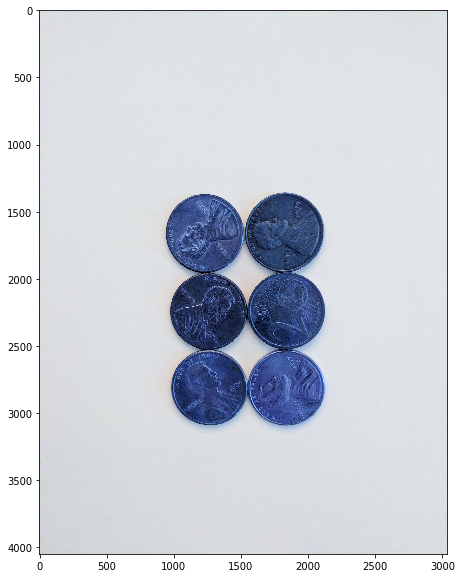

In [4]:
sep_coins = cv2.imread('E://University-working/openCV python/Udemy - Python for Computer Vision with OpenCV and Deep Learning 2019-9/Computer-Vision-with-Python/DATA/pennies.jpg')
display_pic(sep_coins)

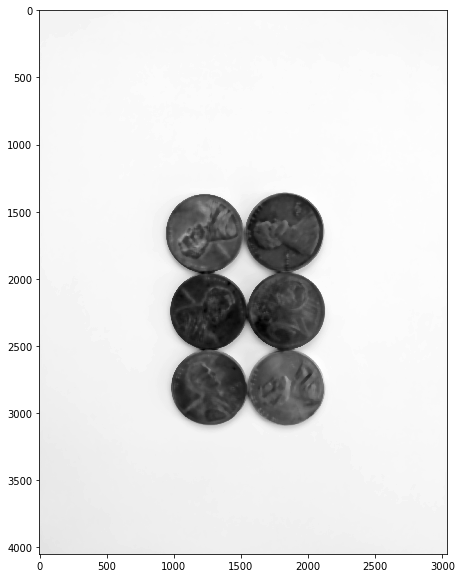

In [5]:
sep_blur = cv2.medianBlur(sep_coins,25)
gray_sep_blur = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)
display_pic(gray_sep_blur)

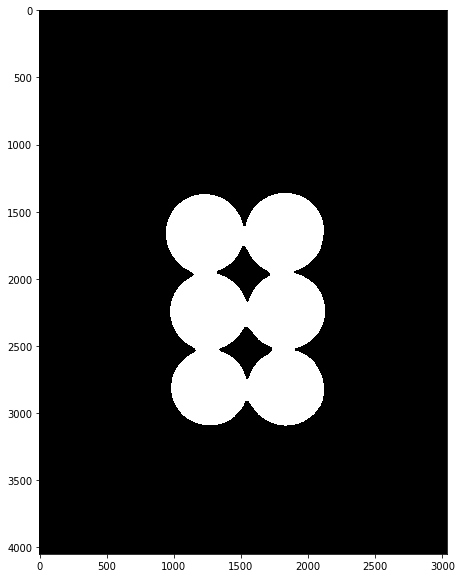

In [6]:
ret,sep_thresh = cv2.threshold(gray_sep_blur,160,255,cv2.THRESH_BINARY_INV)
display_pic(sep_thresh)

In [10]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

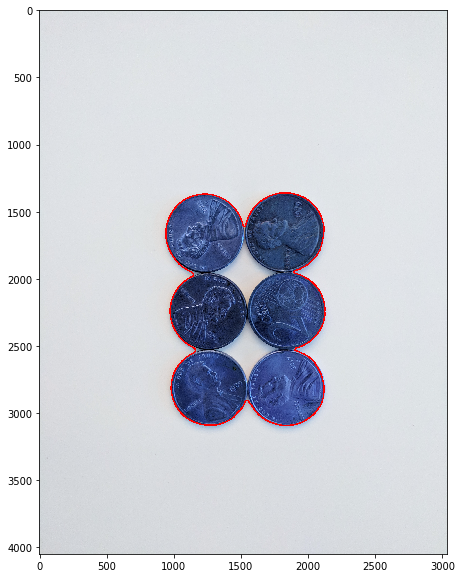

In [13]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
display_pic(sep_coins)

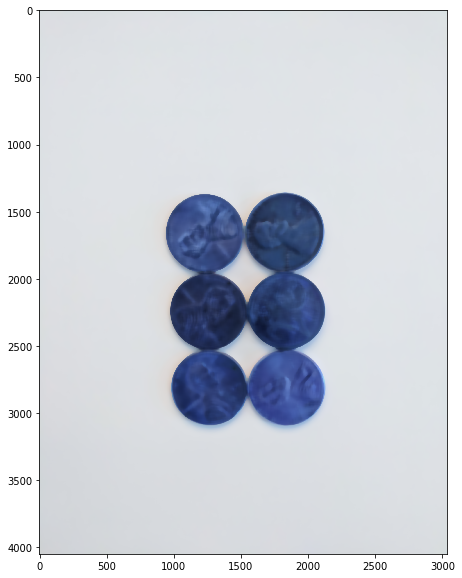

In [15]:
img = cv2.imread('E://University-working/openCV python/Udemy - Python for Computer Vision with OpenCV and Deep Learning 2019-9/Computer-Vision-with-Python/DATA/pennies.jpg')
img = cv2.medianBlur(img,35)
display_pic(img)

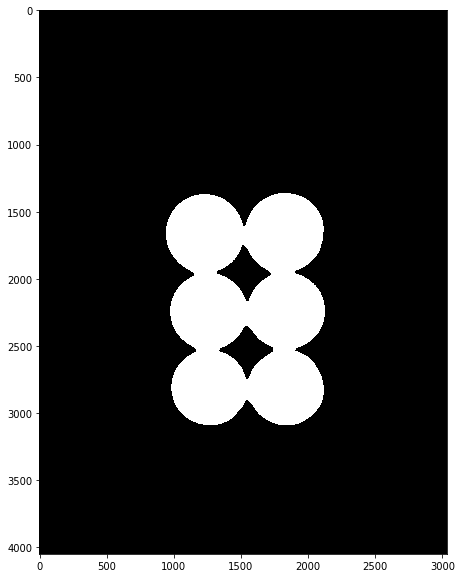

In [16]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
display_pic(thresh)

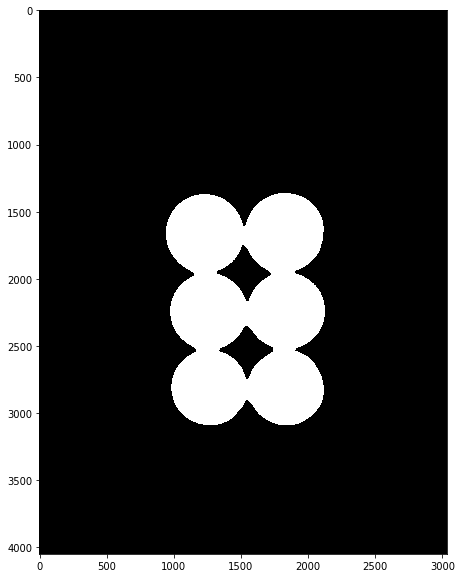

In [17]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)
display_pic(opening)

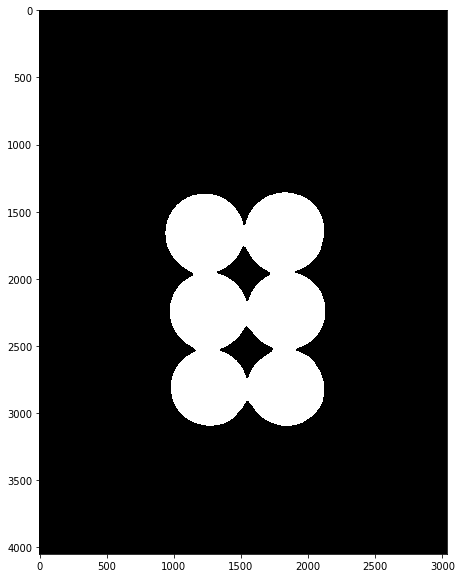

In [18]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
display_pic(sure_bg)

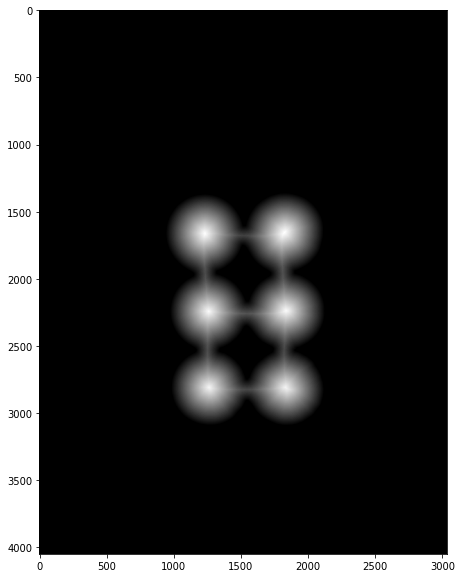

In [19]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
display_pic(dist_transform)

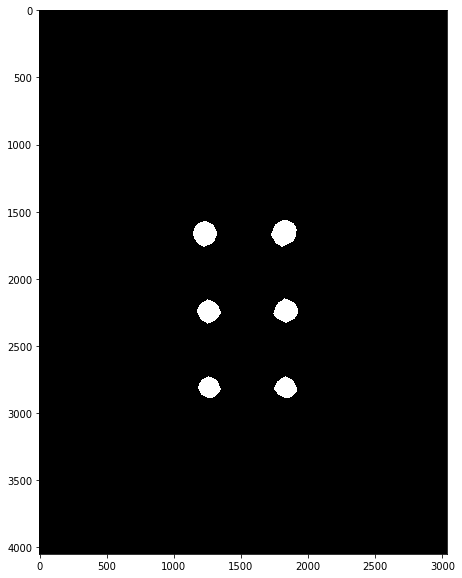

In [20]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
display_pic(sure_fg)

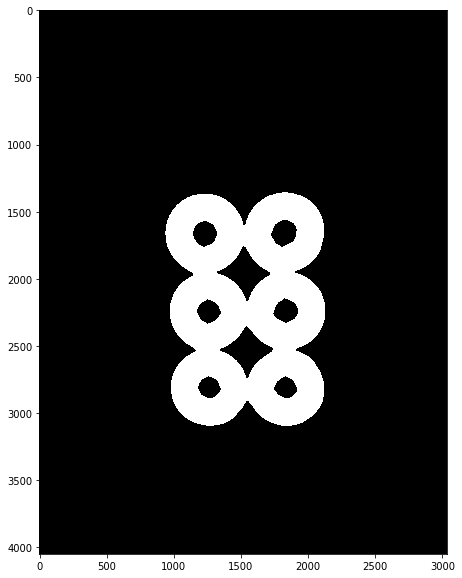

In [21]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
display_pic(unknown)

In [22]:
ret,markers = cv2.connectedComponents(sure_fg)

In [23]:
markers = markers + 1

In [24]:
markers[unknown==255] = 0

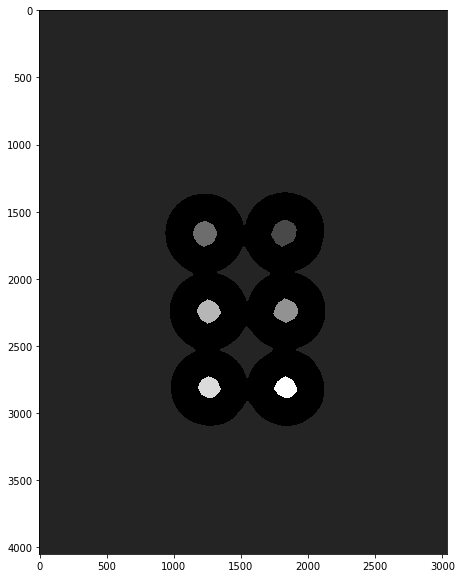

In [25]:
display_pic(markers)

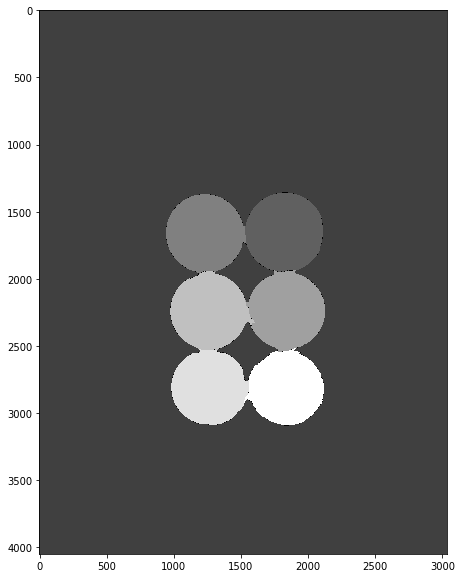

In [26]:
markers = cv2.watershed(img,markers)
display_pic(markers)

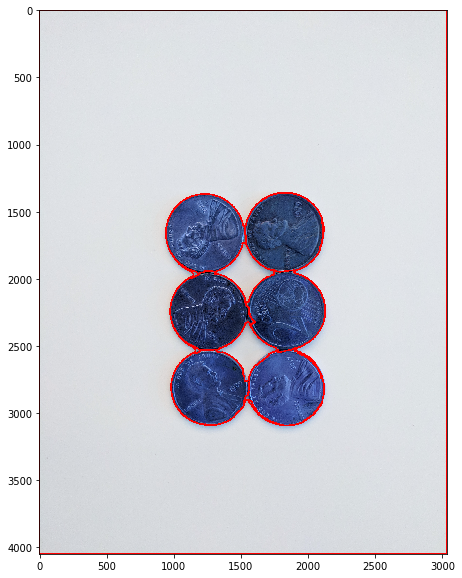

In [28]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1 :
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)
display_pic(sep_coins)